<music21.note.Note C> <music21.note.Note G> <music21.note.Note A> <music21.note.Note G> <music21.note.Note F> <music21.note.Note E> <music21.note.Note D> <music21.note.Note C> <music21.note.Note D>


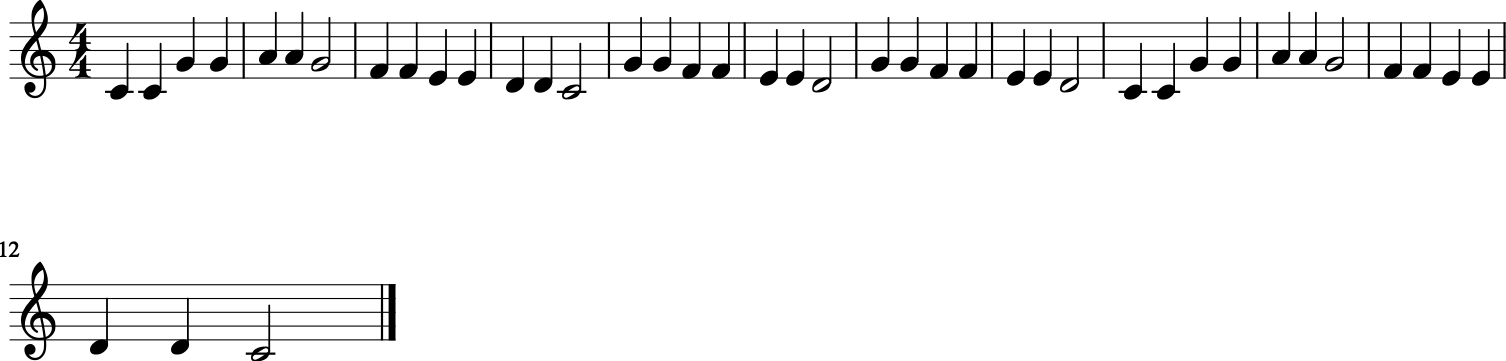

'test.mid'

In [2]:
from music21 import *

s1 = stream.Stream()

n1 = note.Note("C4",quarterLength = 1)
n2 = note.Note("G4",quarterLength = 1)
n3 = note.Note("A4",quarterLength = 1)
n4 = note.Note("G4",quarterLength = 2)
n5 = note.Note("F4",quarterLength = 1)
n6 = note.Note("E4",quarterLength = 1)
n7 = note.Note("D4",quarterLength = 1)
n8 = note.Note("C4",quarterLength = 2)
n9 = note.Note("D4",quarterLength = 2)
print(n1,n2,n3,n4,n5,n6,n7,n8,n9)

s1.repeatAppend(n1, 2)
s1.repeatAppend(n2, 2)
s1.repeatAppend(n3, 2)
s1.append(n4)
s1.repeatAppend(n5, 2)
s1.repeatAppend(n6, 2)
s1.repeatAppend(n7, 2)
s1.append(n8)
s1.repeatAppend(n2, 2)
s1.repeatAppend(n5, 2)
s1.repeatAppend(n6, 2)
s1.append(n9)
s1.repeatAppend(n2, 2)
s1.repeatAppend(n5, 2)
s1.repeatAppend(n6, 2)
s1.repeatAppend(n9, 1)
s1.repeatAppend(n1, 2)
s1.repeatAppend(n2, 2)
s1.repeatAppend(n3, 2)
s1.repeatAppend(n4, 1)
s1.repeatAppend(n5, 2)
s1.repeatAppend(n6, 2)
s1.repeatAppend(n7, 2)
s1.repeatAppend(n8, 1)

s1.show()
s1.write("midi","test.mid")

In [1]:
!python3 play.py "test.mid"

pygame 2.0.0.dev4 (SDL 2.0.10, python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test.mid loaded!


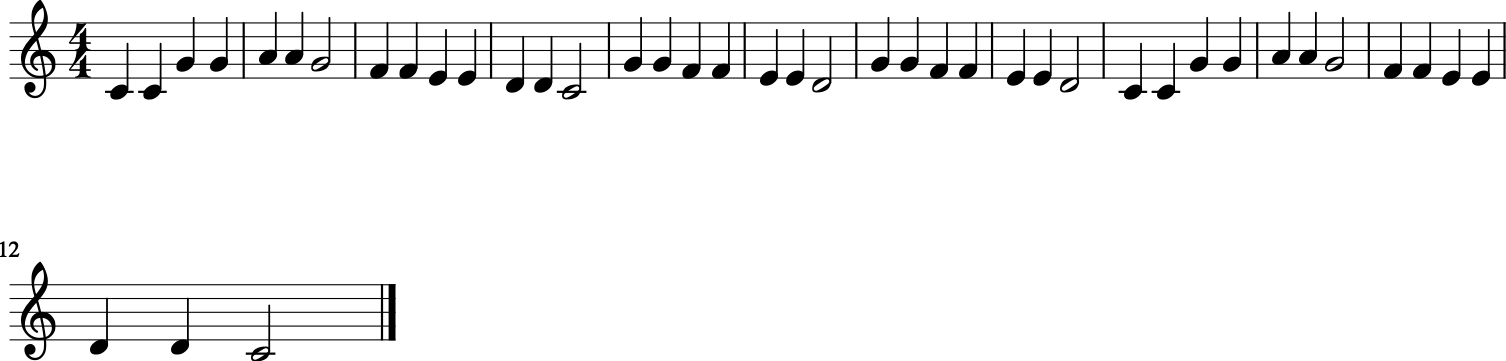

[60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]


In [3]:
nocturne = converter.parse('test.mid')
notes_to_parse = nocturne.parts[0].recurse()  # 対象のパートを一つに絞る
notes_to_parse.show()
pitch = []
quarterLength = []
for element in notes_to_parse:
    if isinstance(element, note.Note):
        pitch.append(int(element.pitch.ps))
        quarterLength.append(float(element.quarterLength))
print(pitch)
print(quarterLength)

In [4]:
s2 = stream.Stream()

for n in range(len(pitch)):
    curnote = pitch[n]
    length=quarterLength[n]
    n = note.Note(midi=curnote,quarterLength = length)

    s2.append(n)

s2.write("midi","test2.mid")

'test2.mid'

In [5]:
!python3 play.py "test2.mid"

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test2.mid loaded!


In [5]:
print(pitch)

[60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]


In [6]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier
from htm.bindings.algorithms import Predictor

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [7]:
scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 48
scalarEncoderParams.maximum = 83
scalarEncoderParams.activeBits = 3
scalarEncoderParams.size = 24
scalarEncoderParams.clipInput  = True

enc = ScalarEncoder(scalarEncoderParams)

print ("60: ", enc.encode(60))
print ("62: ", enc.encode(62))
print ("64: ", enc.encode(64))
print ("65: ", enc.encode(65))
print ("67: ", enc.encode(67))
print ("69: ", enc.encode(69))
print ("71: ", enc.encode(71))

60:  SDR( 24 ) 7, 8, 9
62:  SDR( 24 ) 8, 9, 10
64:  SDR( 24 ) 10, 11, 12
65:  SDR( 24 ) 10, 11, 12
67:  SDR( 24 ) 11, 12, 13
69:  SDR( 24 ) 13, 14, 15
71:  SDR( 24 ) 14, 15, 16


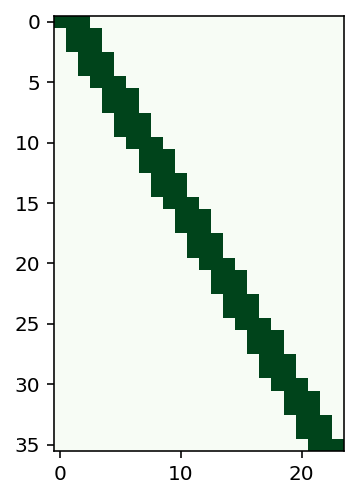

In [8]:
n_samples = int(enc.parameters.maximum - enc.parameters.minimum + 1)

sdrs = []
for i in np.linspace(enc.parameters.minimum, enc.parameters.maximum, n_samples):
    sdrs.append( enc.encode( i ).dense )

#clear_output(wait = True)
#plt.cla
plt.imshow(np.array(sdrs), cmap = "Greens")
plt.show()

In [9]:
inputSDR  = SDR( dimensions = (24, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

print(sp)

Spatial Pooler Connections:
    Inputs (24) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 12 / 12 / 12
    Connected Synapses on Segment Min/Mean/Max 1 / 5.96181 / 11
    Synapses Dead (0%) Saturated (0%)
    Synapses pruned (0%) Segments pruned (0%)



In [10]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (4608) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



In [11]:
phrase=pitch
print(phrase)

[60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]


In [12]:
seq=[]
for i in range(10):
    seq.extend(phrase)
print(seq)

predictor = Predictor( steps=[1,2,3,4], alpha=0.1)
predictor_resolution = 1

[60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60, 67, 67, 65, 65, 64, 64, 62, 67, 67, 65, 65, 64, 64, 62, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62,

In [13]:
predictions = {1: [], 2: [], 3: [], 4: []}
for i in range(len(seq)):
    inputSDR = enc.encode(seq[i])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=True)
    
    predictor.learn(i, tm.getActiveCells(), int(seq[i] / predictor_resolution))

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4):
        if pdf[n]:
            predictions[n].append( np.argmax( pdf[n] ) * predictor_resolution )
        else:
            predictions[n].append(float('nan'))
print(predictions)

{1: [nan, 60, 67, 67, 69, 69, 69, 65, 65, 64, 64, 67, 62, 67, 65, 67, 64, 62, 64, 64, 60, 67, 65, 65, 65, 64, 64, 67, 67, 60, 67, 65, 67, 67, 67, 64, 64, 64, 64, 60, 60, 60, 67, 60, 67, 65, 69, 67, 67, 65, 62, 62, 64, 60, 60, 60, 67, 65, 65, 62, 62, 64, 62, 67, 67, 65, 62, 64, 64, 62, 60, 67, 67, 65, 69, 67, 65, 65, 62, 64, 64, 60, 60, 60, 67, 67, 67, 65, 69, 67, 65, 65, 62, 64, 64, 62, 60, 60, 67, 69, 65, 62, 62, 64, 62, 67, 65, 65, 62, 64, 64, 62, 60, 67, 67, 65, 69, 67, 65, 65, 64, 62, 64, 60, 60, 60, 67, 67, 67, 69, 69, 67, 65, 65, 64, 62, 64, 62, 60, 60, 67, 69, 65, 64, 62, 64, 62, 67, 65, 65, 64, 62, 64, 62, 60, 67, 67, 65, 69, 67, 65, 65, 64, 62, 64, 60, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 62, 64, 62, 60, 60, 67, 69, 65, 64, 62, 64, 62, 67, 65, 65, 64, 62, 64, 62, 60, 67, 67, 65, 69, 67, 65, 65, 64, 62, 64, 60, 60, 60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 62, 64, 62, 60, 60, 67, 69, 65, 64, 62, 64, 62, 67, 65, 65, 64, 62, 64, 67, 60, 67, 67, 65, 69, 67, 65, 65, 64, 62, 64

In [14]:
test=[60,60,67,67,69,69,67]

test_predictions = {1: [], 2: [], 3: [], 4: []}
for j in range(len(test)):
    inputSDR = enc.encode(test[j])
    sp.compute(inputSDR, True, activeSDR)

    tm.compute( activeSDR, learn=False)
    
    #predictor.learn(j+len(seq)+8+len(test), tm.getActiveCells(), int(test[j] / predictor_resolution))

    pdf = predictor.infer( tm.getActiveCells() )
    for n in (1,2,3,4):
        if pdf[n]:
            test_predictions[n].append( np.argmax( pdf[n] ) * predictor_resolution )
        else:
            test_predictions[n].append(float('nan'))
print(test_predictions)

{1: [60, 67, 67, 69, 69, 67, 65], 2: [67, 67, 69, 69, 67, 65, 65], 3: [67, 69, 69, 67, 65, 65, 64], 4: [69, 69, 67, 65, 65, 64, 64]}


In [15]:
next_prediction=[test_predictions[1][6],test_predictions[2][6],test_predictions[3][6],test_predictions[4][6]]
print(next_prediction)

[65, 65, 64, 64]


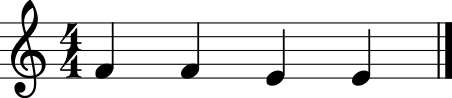

'test3.mid'

In [16]:
s3 = stream.Stream()

for n in range(len(next_prediction)):
    curnote = next_prediction[n]
    length=1
    n = note.Note(midi=curnote,quarterLength = length)

    s3.append(n)

s3.show()
s3.write("midi","test3.mid")

In [17]:
!python3 play.py "test3.mid"

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Music file test3.mid loaded!
